# **Assignment : 3**

### **Name : NIKHIL N S**

### **SRNo : 24906**

# **1. Data Collection and Preprocessing**

### **a. How did you visualize the time-series data to identify trends in air quality before and after the lockdown? What insights did you gain from this visualization?**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("delhi _ bangalore CPCB AIR QUALITY data 2017- 2020 (1).csv")
data.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,DL001,2018-11-11,232.36,415.28,1.72,79.86,43.87,37.40,1.49,23.48,46.28,6.14,17.67,0.28,NaN,NaN
1,DL001,2018-11-12,238.43,348.91,3.25,78.95,44.63,36.04,1.53,14.38,45.31,6.64,13.58,0.30,404.0,Severe
2,DL001,2018-11-13,284.83,427.40,19.98,112.54,76.15,41.25,1.43,21.33,30.40,8.80,43.51,0.94,406.0,Severe
3,DL001,2018-11-14,150.41,214.16,6.35,96.17,56.30,36.02,0.99,12.74,41.87,5.64,28.30,0.51,372.0,Very Poor
4,DL001,2018-11-15,106.11,154.36,7.36,77.52,47.21,30.45,0.70,12.46,27.93,4.20,33.48,0.59,280.0,Poor


In [3]:
delhi_data = data[data['StationId'].str.startswith('DL')].sort_values(by='Date')
bangalore_data = data[data['StationId'].str.startswith('KA')].sort_values(by='Date')

In [4]:
delhi_data.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
6009,DL007,2015-01-01,425.49,607.98,49.37,40.91,90.29,NaN,0.69,NaN,143.84,9.19,14.16,9.84,579.0,Severe
38638,DL033,2015-01-01,NaN,NaN,97.55,39.67,159.86,NaN,16.29,7.07,5.76,17.76,30.91,NaN,NaN,NaN
14380,DL013,2015-01-01,200.96,NaN,17.06,12.39,24.73,42.98,21.82,8.91,NaN,NaN,NaN,NaN,364.0,Very Poor
24712,DL021,2015-01-01,NaN,NaN,150.68,52.50,227.11,NaN,26.38,11.78,2.67,16.12,29.52,NaN,NaN,NaN
8018,DL008,2015-01-01,NaN,NaN,38.71,36.49,50.98,21.74,NaN,NaN,42.20,NaN,NaN,NaN,NaN,NaN


In [5]:
bangalore_data.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
52914,KA009,2015-01-01,NaN,NaN,2.51,10.79,7.14,20.36,1.15,5.08,NaN,NaN,1.15,NaN,NaN,NaN
46265,KA003,2015-01-01,NaN,NaN,4.01,23.86,14.62,NaN,0.30,2.01,10.73,0.56,4.80,NaN,NaN,NaN
46266,KA003,2015-01-02,NaN,NaN,9.21,26.33,19.72,NaN,0.38,3.64,22.77,0.65,4.55,NaN,NaN,NaN
52915,KA009,2015-01-02,NaN,NaN,2.90,13.13,8.57,23.74,15.93,4.31,NaN,NaN,15.93,NaN,NaN,NaN
46267,KA003,2015-01-03,NaN,NaN,11.22,24.52,20.34,NaN,0.38,4.06,12.03,0.53,3.45,NaN,NaN,NaN


In [6]:
lock_down_start = '2020-03-25'
lock_down_end = '2020-05-31'

pre_ld_delhi = delhi_data[delhi_data['Date'] < lock_down_start]
ld_delhi = delhi_data[(delhi_data['Date'] >= lock_down_start) & (delhi_data['Date'] <= lock_down_end)]
post_ld_delhi = delhi_data[delhi_data['Date'] > lock_down_end]

pre_ld_bangalore = bangalore_data[bangalore_data['Date'] < lock_down_start]
ld_bangalore = bangalore_data[(bangalore_data['Date'] >= lock_down_start) & (bangalore_data['Date'] <= lock_down_end)]
post_ld_bangalore = bangalore_data[bangalore_data['Date'] > lock_down_end]

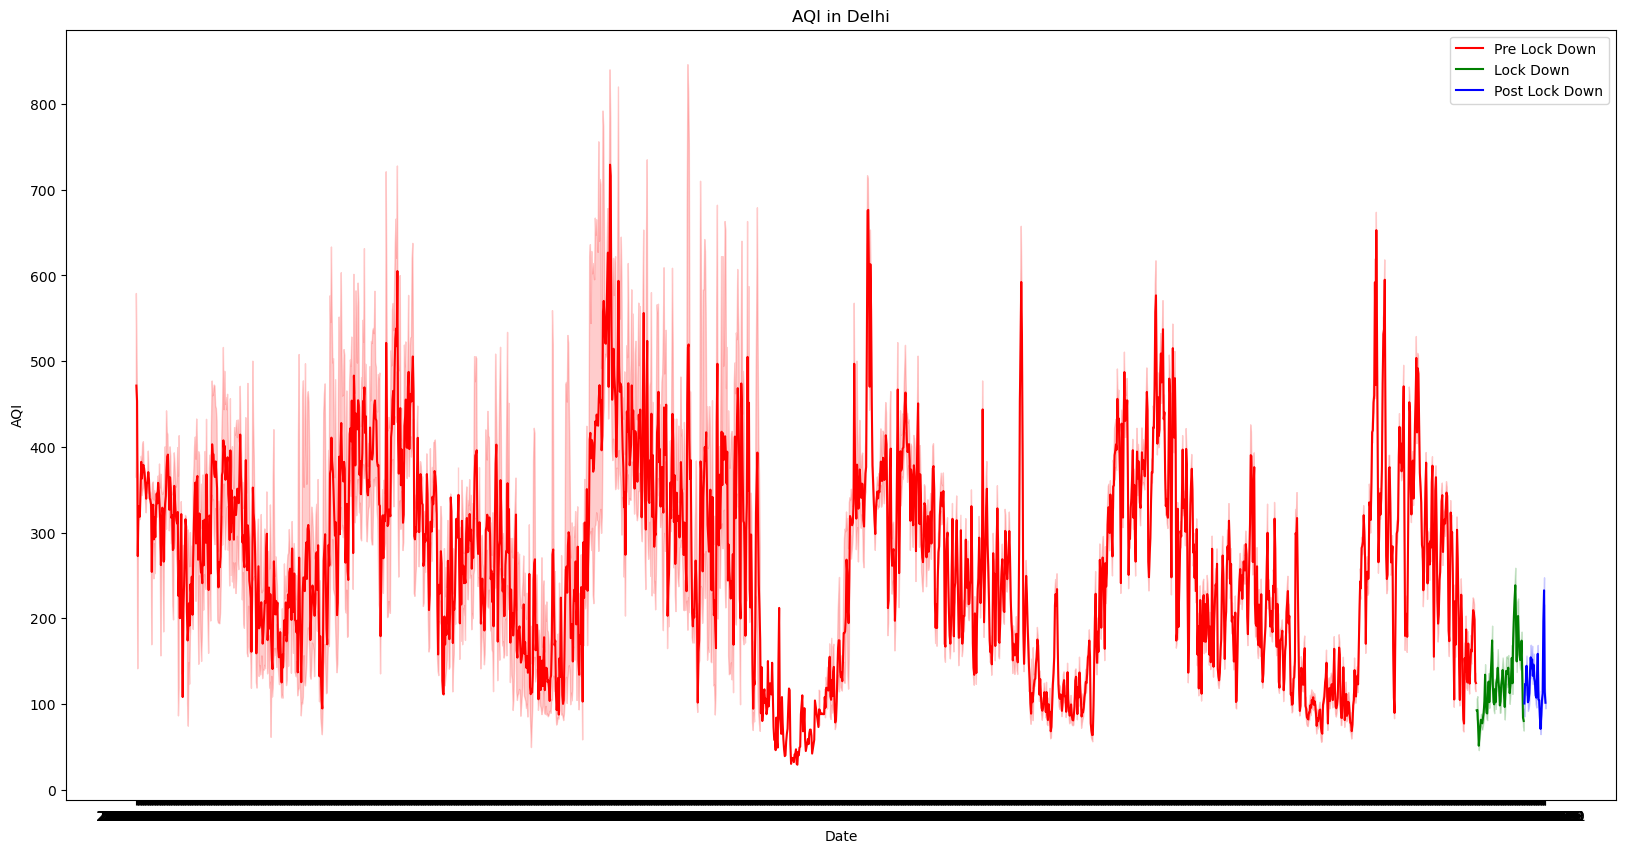

In [7]:
plt.figure(figsize=(20,10))
sns.lineplot(x="Date", y="AQI",data=pre_ld_delhi,color='red',label='Pre Lock Down')
sns.lineplot(x="Date", y="AQI",data=ld_delhi,color='green', label='Lock Down')
sns.lineplot(x="Date", y="AQI",data=post_ld_delhi,color='blue', label='Post Lock Down')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('AQI in Delhi')
plt.legend()
plt.show()

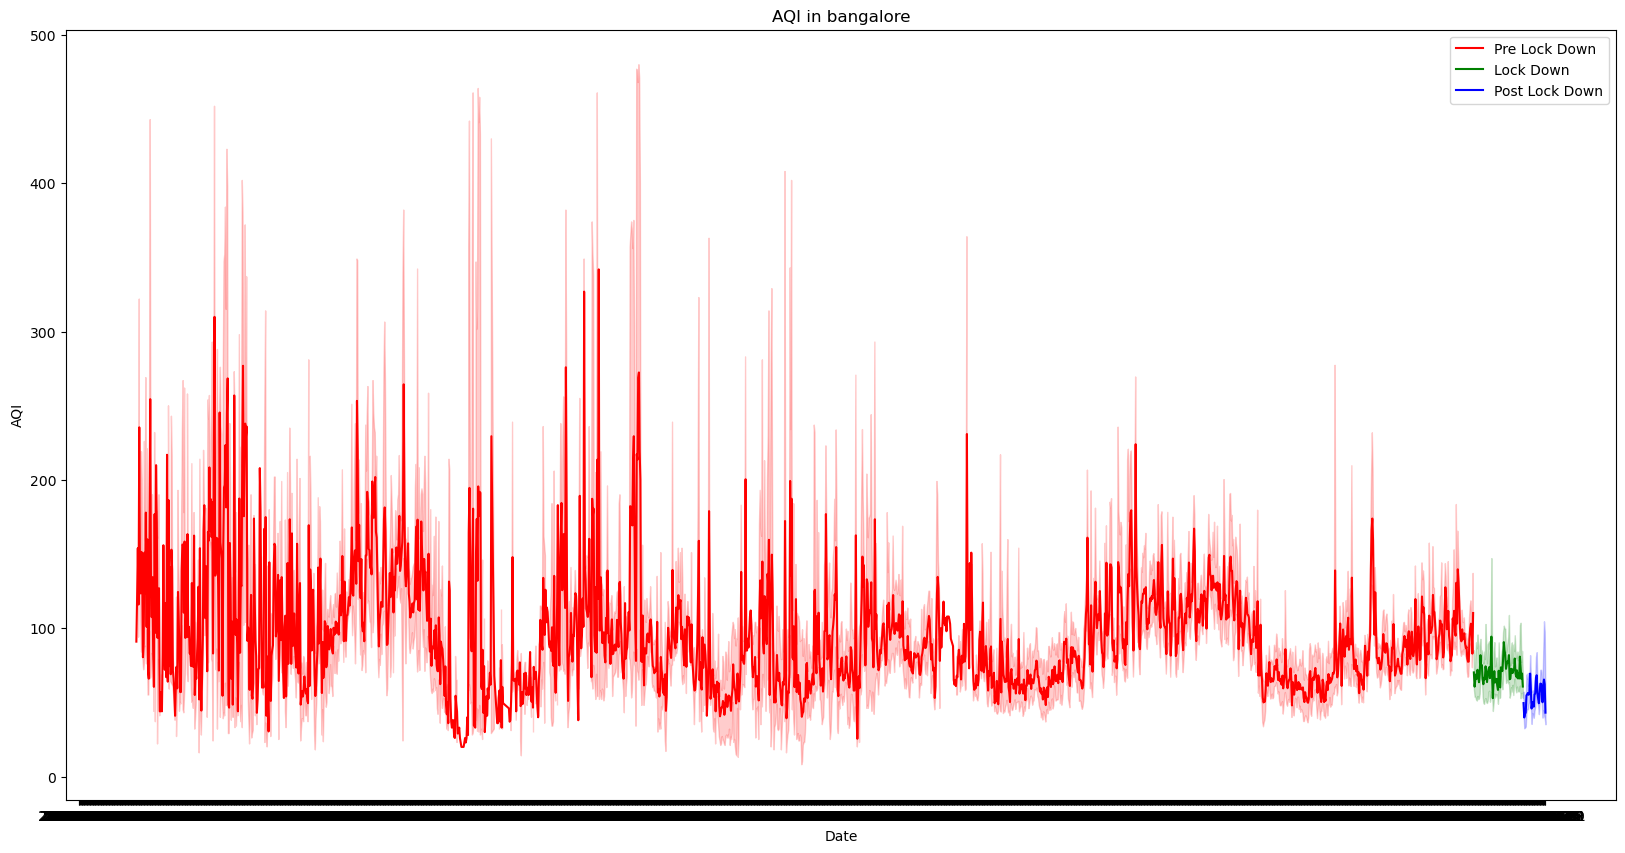

In [8]:
plt.figure(figsize=(20,10))
sns.lineplot(x="Date", y="AQI",data=pre_ld_bangalore,color='red',label='Pre Lock Down')
sns.lineplot(x="Date", y="AQI",data=ld_bangalore,color='green', label='Lock Down')
sns.lineplot(x="Date", y="AQI",data=post_ld_bangalore,color='blue', label='Post Lock Down')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('AQI in bangalore')
plt.legend()
plt.show()

In [34]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=pre_ld_delhi['Date'], y=pre_ld_delhi['AQI'],mode='lines', name='Pre Lock Down', line=dict(color='red')))
fig.add_trace(go.Scatter(x=ld_delhi['Date'], y=ld_delhi['AQI'],mode='lines', name='Lock Down', line=dict(color='green')))
fig.add_trace(go.Scatter(x=post_ld_delhi['Date'], y=post_ld_delhi['AQI'],mode='lines', name='Post Lock Down', line=dict(color='blue')))

fig.update_layout(title='AQI in delhi',xaxis_title='Date',yaxis_title='AQI',legend_title='Period',template='plotly_white',width=1200,height=600)

fig.show()

In [10]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=pre_ld_bangalore['Date'], y=pre_ld_bangalore['AQI'],mode='lines', name='Pre Lock Down', line=dict(color='red')))
fig.add_trace(go.Scatter(x=ld_bangalore['Date'], y=ld_bangalore['AQI'],mode='lines', name='Lock Down', line=dict(color='green')))
fig.add_trace(go.Scatter(x=post_ld_bangalore['Date'], y=post_ld_bangalore['AQI'],mode='lines', name='Post Lock Down', line=dict(color='blue')))

fig.update_layout(title='AQI in Bangalore',xaxis_title='Date',yaxis_title='AQI',legend_title='Period',template='plotly_white',width=1200,height=600)

fig.show()

## **Insights from Visualization**

1.The AQI values before the lockdown may show high pollution levels.

2.A significant drop in AQI during the lockdown period is expected due to reduced vehicular and industrial emissions.

3.Post-lockdown, AQI might rise again as economic activities resume.

# **2.Correlation Analysis**

### **a. What are the key correlations observed between the Air Quality Index (AQI) and individual pollutants in both cities?**

In [11]:
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

delhi_corr = delhi_data[pollutants + ['AQI']].corr()['AQI'][:-1]
delhi_corr = delhi_corr.sort_values(ascending=False)

bangalore_corr = bangalore_data[pollutants + ['AQI']].corr()['AQI'][:-1]
bangalore_corr = bangalore_corr.sort_values(ascending=False)

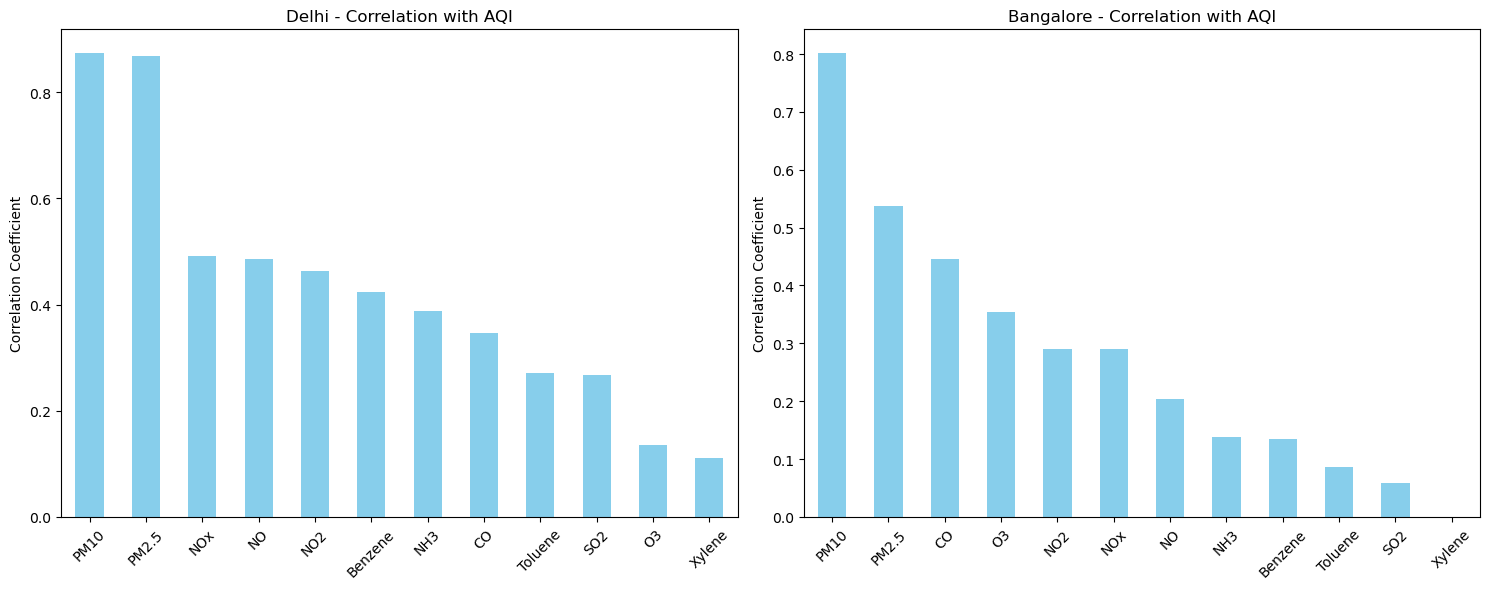

In [12]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
delhi_corr.plot(kind='bar',color='skyblue')
plt.title('Delhi - Correlation with AQI')
plt.xticks(rotation=45)
plt.ylabel('Correlation Coefficient')

plt.subplot(1, 2, 2)
bangalore_corr.plot(kind='bar',color='skyblue')
plt.title('Bangalore - Correlation with AQI')
plt.xticks(rotation=45)
plt.ylabel('Correlation Coefficient')

plt.tight_layout()
plt.show()

In [13]:
fig = px.bar(x=delhi_corr.index, y=delhi_corr.values,title='delhi - Correlation with AQI',labels={'x': 'Pollutants', 'y': 'Correlation Coefficient'})
fig.show()

In [14]:
fig = px.bar(x=bangalore_corr.index, y=bangalore_corr.values,title='bangalore - Correlation with AQI',labels={'x': 'Pollutants', 'y': 'Correlation Coefficient'})

fig.show()

### **b. How does the correlation between AQI and pollutants in Bangalore compare to that of Delhi? What potential environmental or industrial factors could explain these differences?**

1. **Correlation Strength**:
    - In Delhi, PM10 and PM2.5 show the highest correlation with AQI, with correlation coefficients of 0.874875 and 0.868053, respectively.
    - In Bangalore, PM10 and PM2.5 also show the highest correlation with AQI, but the correlation coefficients are slightly lower at 0.802536 and 0.537163, respectively.

2. **Secondary Pollutants**:
    - In Delhi, NOx, NO, and NO2 have moderate correlations with AQI, with correlation coefficients of 0.491725, 0.485129, and 0.463899, respectively.
    - In Bangalore, CO and O3 have moderate correlations with AQI, with correlation coefficients of 0.446025 and 0.353688, respectively.

3. **Industrial Emissions**:
    - The higher correlation of NOx, NO, and NO2 with AQI in Delhi suggests significant contributions from vehicular and industrial emissions, which are common sources of these pollutants.
    - In Bangalore, the moderate correlation of CO and O3 with AQI indicates the influence of different industrial activities and possibly higher levels of photochemical reactions leading to ozone formation.

4. **Geographical and Climatic Factors**:
    - Delhi's geographical location and climatic conditions, such as temperature inversions and low wind speeds, can lead to the accumulation of pollutants, resulting in higher AQI values.
    - Bangalore's relatively better air dispersion conditions due to its topography and climate might contribute to lower AQI values and different pollutant correlations.

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

def seasonal_imputation(df, feature):
    df = df.copy()
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

    df[feature] = df[feature].interpolate(method='linear', limit_direction='both')

    if df[feature].dropna().shape[0] > 730:
        decomposition = seasonal_decompose(df[feature], model='additive', period=365, extrapolate_trend='freq')
        df[feature] = df[feature].fillna(decomposition.trend) 

    df[feature] = df[feature].ffill().bfill()
    df.reset_index(inplace=True)
    return df

for feature in pollutants:
    delhi_data = seasonal_imputation(delhi_data, feature)
    bangalore_data = seasonal_imputation(bangalore_data, feature)

delhi_data.isnull().sum(), bangalore_data.isnull().sum()


(Date             0
 StationId        0
 PM2.5            0
 PM10             0
 NO               0
 NO2              0
 NOx              0
 NH3              0
 CO               0
 SO2              0
 O3               0
 Benzene          0
 Toluene          0
 Xylene           0
 AQI           9253
 AQI_Bucket    9253
 dtype: int64,
 Date              0
 StationId         0
 PM2.5             0
 PM10              0
 NO                0
 NO2               0
 NOx               0
 NH3               0
 CO                0
 SO2               0
 O3                0
 Benzene           0
 Toluene           0
 Xylene        11996
 AQI            2357
 AQI_Bucket     2357
 dtype: int64)

# **3. Normalization and Its Effect** 

### **a. Explain the process and importance of applying normalization (Min-Max scaling or Standardization) to the dataset?**

Normalization is a data preprocessing technique used to scale numerical values into a standardized range, ensuring that different features contribute equally to machine learning models.It is crucial when working with datasets containing variables with different units and scales, such as PM2.5 (in µg/m³) and CO (in ppm) in air quality analysis.

**(a) Min-Max Scaling (Range Normalization)**

Scales data between a fixed range, usually [0,1].

Formula: 

**X**'= **X-X**min / **X**max-**X**min

Effect: Preserves relative relationships but compresses the influence of extreme values.

When to Use: When you want to keep original distribution patterns.

**(b) Standardization (Z-Score Normalization)**

Transforms data to have a mean (μ) of 0 and standard deviation (σ) of 1.

Formula:

 **x'** = **X−μ / σ**
​

 
Effect: Handles outliers better and ensures Gaussian-like distribution.

When to Use: When data follows a normal distribution (e.g., in regression models).



In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

delhi_data_norm = scaler.fit_transform(delhi_data[pollutants])
dehli_data_norm=pd.DataFrame(delhi_data_norm, columns=pollutants)
dehli_data_norm["Date"] = delhi_data["Date"]
dehli_data_norm['AQI'] = delhi_data['AQI']
dehli_data_norm["AQI_Bucket"] = delhi_data["AQI_Bucket"]
dehli_data_norm.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,Date,AQI,AQI_Bucket
0,0.425214,0.622408,0.113006,0.102803,0.199048,0.102452,0.014271,0.054027,0.149349,0.049550,0.035679,0.100418,2015-01-01,579.0,Severe
1,0.312895,0.583908,0.223311,0.099686,0.352417,0.102452,0.336918,0.054027,0.005961,0.095757,0.077884,0.094125,2015-01-01,NaN,NaN
2,0.200576,0.545407,0.039035,0.031100,0.054518,0.102452,0.451293,0.068168,0.004356,0.091336,0.076133,0.087832,2015-01-01,364.0,Very Poor
3,0.210613,0.506906,0.344948,0.131942,0.500672,0.077096,0.545605,0.090224,0.002752,0.086914,0.074382,0.081539,2015-01-01,NaN,NaN
4,0.220650,0.468405,0.088601,0.091691,0.112387,0.051739,0.480041,0.083154,0.043802,0.073139,0.062602,0.075246,2015-01-01,NaN,NaN


In [17]:
bengalore_data_norm = scaler.fit_transform(bangalore_data[pollutants])
bengalore_data_norm=pd.DataFrame(bengalore_data_norm, columns=pollutants)
bengalore_data_norm["Date"] = bangalore_data["Date"]
bengalore_data_norm['AQI'] =  bangalore_data['AQI']
bengalore_data_norm.head()

c:\Users\nbhag\OneDrive - Indian Institute of Science\Documents\anconda\Lib\site-packages\sklearn\utils\_array_api.py:695: RuntimeWarning:

All-NaN slice encountered

c:\Users\nbhag\OneDrive - Indian Institute of Science\Documents\anconda\Lib\site-packages\sklearn\utils\_array_api.py:712: RuntimeWarning:

All-NaN slice encountered



,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,Date,AQI
0,0.047734,0.08501,0.005213,0.027136,0.018376,0.129179,0.023018,0.025666,0.067723,0.001822,0.002795,NaN,2015-01-01,NaN
1,0.047734,0.08501,0.008405,0.060314,0.037627,0.136380,0.006005,0.009970,0.067723,0.001822,0.011664,NaN,2015-01-01,NaN
2,0.047734,0.08501,0.019471,0.066584,0.050753,0.143582,0.007606,0.018304,0.144357,0.002114,0.011057,NaN,2015-01-02,NaN
3,0.047734,0.08501,0.006043,0.033076,0.022056,0.150783,0.318855,0.021729,0.110178,0.001919,0.038710,NaN,2015-01-02,NaN
4,0.047734,0.08501,0.023748,0.061989,0.052348,0.088718,0.007606,0.020451,0.075998,0.001724,0.008384,NaN,2015-01-03,NaN


In [18]:
def remove_outliers_iqr(df, features):
    Q1 = df[features].quantile(0.25)
    Q3 = df[features].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[~((df[features] < lower_bound) | (df[features] > upper_bound)).any(axis=1)]

delhi_data_iqr = remove_outliers_iqr(delhi_data, pollutants)
bangalore_data_iqr = remove_outliers_iqr(bangalore_data, pollutants)
delhi_data_norm_iqr = remove_outliers_iqr(dehli_data_norm, pollutants)
bangalore_data_norm_iqr = remove_outliers_iqr(bengalore_data_norm, pollutants)

delhi_data.shape, bangalore_data.shape, delhi_data_iqr.shape, bangalore_data_iqr.shape, delhi_data_norm_iqr.shape, bangalore_data_norm_iqr.shape

((45360, 16), (11996, 16), (27422, 16), (7650, 16), (27422, 15), (7650, 14))

In [19]:
from sklearn.ensemble import IsolationForest
def remove_outliers_isolation_forest(df, features):
    iso_forest = IsolationForest(contamination=0.05, random_state=42)
    outliers = iso_forest.fit_predict(df[features])
    return df[outliers == 1]

delhi_data_iso = remove_outliers_isolation_forest(delhi_data, pollutants)
dehli_data_norm_iso = remove_outliers_isolation_forest(dehli_data_norm, pollutants)
# bangalore_data_iso = remove_outliers_isolation_forest(bangalore_data, pollutants)

# Display the cleaned data
print("Delhi Data", delhi_data.shape)
print("Delhi Data after Isolation Forest Outlier Removal:", delhi_data_iso.shape)
print("Delhi Data after Isolation Forest Outlier Removal:", dehli_data_norm_iso.shape)
# print("Bangalore Data after Isolation Forest Outlier Removal:", bangalore_data_iso.shape)

Delhi Data (45360, 16)
Delhi Data after Isolation Forest Outlier Removal: (43092, 16)
Delhi Data after Isolation Forest Outlier Removal: (43092, 15)


**The bangalore data is not being displayed beacuse in features have many missing values and the isolation forest is not able to handle missing values**
**So I will use the IQR method to remove the outliers from the bangalore data**

# **4. Regression Analysis**

### **a. Perform a regression analysis to predict AQI based on individual pollutants. What is the relationship between specific pollutants and AQI in both cities?**

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
def regression_analysis(df, pollutants):
    df = df.dropna(subset=['AQI'])  # Drop rows where AQI is missing
    X = df[pollutants]
    y = df['AQI']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Linear Regression Model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Evaluate Model
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"Regression Model Performance:\n RMSE: {rmse:.5f}, R²: {r2:.5f}")
    return model

In [22]:
print("Delhi Seasonal Imputation Method filled data AQI Prediction:")
delhi_model = regression_analysis(delhi_data, pollutants)

Delhi Seasonal Imputation Method filled data AQI Prediction:
Regression Model Performance:
 RMSE: 52.63557, R²: 0.84032


In [23]:
print("Bangalore Seasonal Imputation Method filled data AQI Prediction:")
Bangalore_model = regression_analysis(bangalore_data, pollutants[0:10])

Bangalore Seasonal Imputation Method filled data AQI Prediction:
Regression Model Performance:
 RMSE: 36.80954, R²: 0.54308


In [24]:
print("Delhi Normalized Data AQI Prediction:")
delhi_data_scaled = pd.DataFrame(delhi_data_norm, columns=pollutants)
delhi_data_scaled['AQI'] = delhi_data['AQI']
delhi_model = regression_analysis(delhi_data_scaled, pollutants)

Delhi Normalized Data AQI Prediction:
Regression Model Performance:
 RMSE: 52.63557, R²: 0.84032


In [25]:
print("Bangalore Normalized Data AQI Prediction:")
bangalore_data_scaled = pd.DataFrame(bengalore_data_norm, columns=pollutants[0:10])
bangalore_data_scaled['AQI'] = bangalore_data['AQI']
bangalore_model = regression_analysis(bangalore_data_scaled, pollutants[0:10])

Bangalore Normalized Data AQI Prediction:
Regression Model Performance:
 RMSE: 36.80954, R²: 0.54308


In [26]:
print("Delhi IQR outlier Removed Data AQI Prediction:")
delhi_model = regression_analysis(delhi_data_iqr, pollutants)

Delhi IQR outlier Removed Data AQI Prediction:
Regression Model Performance:
 RMSE: 40.06614, R²: 0.84097


In [27]:
print("Bengalore AQI Prediction:")
Bangalore_model = regression_analysis(bangalore_data_iqr, pollutants[0:10])

Bengalore AQI Prediction:
Regression Model Performance:
 RMSE: 23.65539, R²: 0.52301


In [28]:
print("Delhi IQR outlier Removed Data AQI Prediction:")
delhi_model = regression_analysis(delhi_data_norm_iqr, pollutants)

Delhi IQR outlier Removed Data AQI Prediction:
Regression Model Performance:
 RMSE: 40.06614, R²: 0.84097


In [29]:
bangalore_data_norm_iqr = remove_outliers_iqr(bangalore_data_scaled, pollutants[0:10])

print("Bangalore IQR outlier Removed Data AQI Prediction:")
Bangalore_model = regression_analysis(bangalore_data_norm_iqr, pollutants[0:10])

Bangalore IQR outlier Removed Data AQI Prediction:
Regression Model Performance:
 RMSE: 20.79955, R²: 0.59263


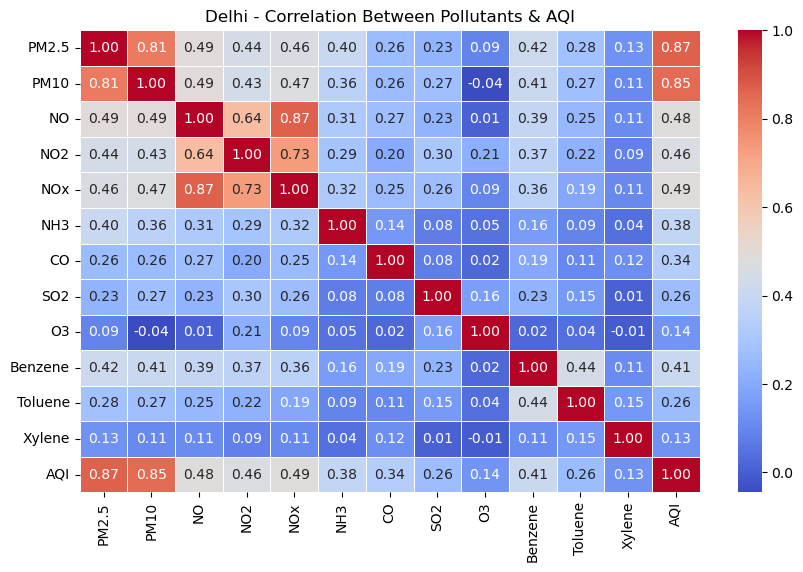

C:\Users\nbhag\AppData\Local\Temp\ipykernel_12828\2547880294.py:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




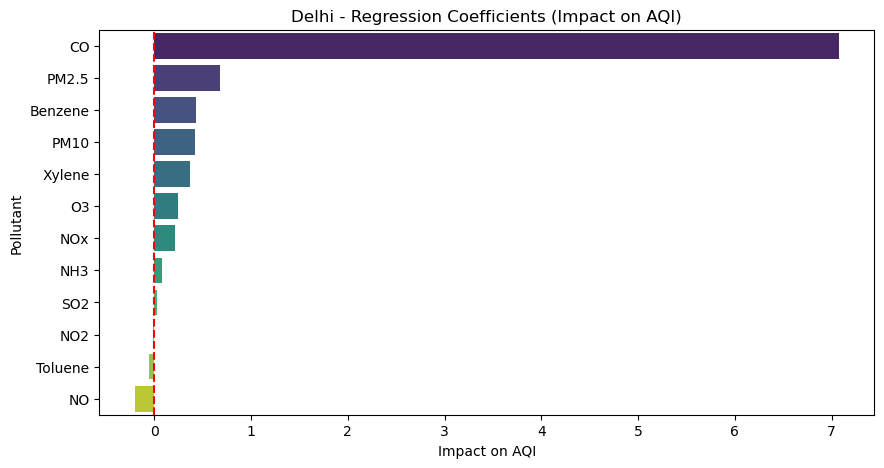

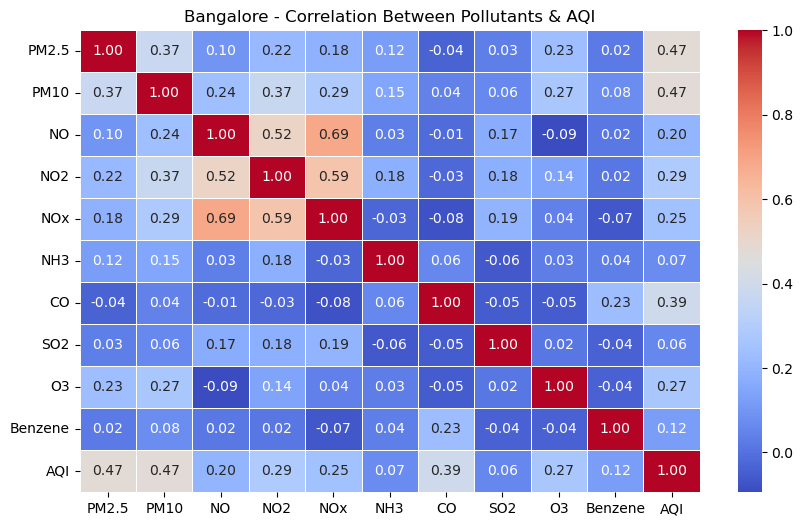

C:\Users\nbhag\AppData\Local\Temp\ipykernel_12828\2547880294.py:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




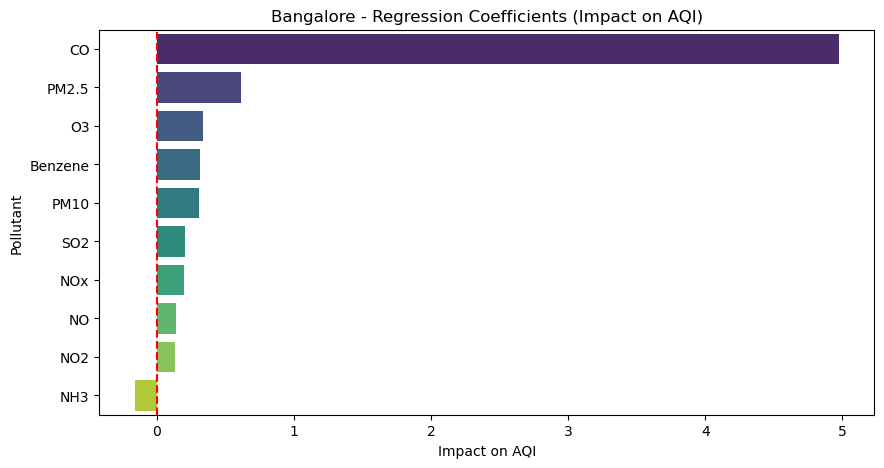

Top pollutants affecting AQI in Delhi:
    Pollutant  Coefficient
6         CO     7.076318
0      PM2.5     0.682751
9    Benzene     0.428314
1       PM10     0.417507
11    Xylene     0.372279

Top pollutants affecting AQI in Bangalore:
   Pollutant  Coefficient
6        CO     4.974977
0     PM2.5     0.611516
8        O3     0.336198
9   Benzene     0.311872
1      PM10     0.310071


In [30]:
def analyze_pollutants_vs_aqi(city_name, data, pollutants):
    data_clean = data.dropna(subset=pollutants + ['AQI'])

    # Compute Pearson correlation
    corr_matrix = data_clean[pollutants + ['AQI']].corr()

    # Train Linear Regression Model
    X = data_clean[pollutants]
    y = data_clean['AQI']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Get feature importance (regression coefficients)
    feature_importance = pd.DataFrame({'Pollutant': pollutants, 'Coefficient': model.coef_})
    feature_importance = feature_importance.sort_values(by="Coefficient", ascending=False)

    # Plot Correlation Heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title(f"{city_name} - Correlation Between Pollutants & AQI")
    plt.show()

    # Plot Feature Importance (Bar Chart)
    plt.figure(figsize=(10, 5))
    sns.barplot(x='Coefficient', y='Pollutant', data=feature_importance, palette="viridis")
    plt.axvline(0, color='red', linestyle='--')  # Reference line at 0
    plt.title(f"{city_name} - Regression Coefficients (Impact on AQI)")
    plt.xlabel("Impact on AQI")
    plt.ylabel("Pollutant")
    plt.show()

    return feature_importance

# Analyze for Delhi
delhi_results = analyze_pollutants_vs_aqi("Delhi", delhi_data, pollutants)

# Analyze for Bangalore
bangalore_results = analyze_pollutants_vs_aqi("Bangalore", bangalore_data, pollutants[0:10])  # Adjust for available features

# Print top pollutants affecting AQI
print("Top pollutants affecting AQI in Delhi:\n", delhi_results.head(5))
print("\nTop pollutants affecting AQI in Bangalore:\n", bangalore_results.head(5))


### **b.Compare the results of linear regression models before and after normalization. Did normalization improve theregressiomodel's performance or interpretability? How did you handle missing values in the dataset for Delhi (DL) and Bangalore (KA)? What imputation methods/removal techniques were applied, and why?**

### **Comparison of Linear Regression Models Before & After Normalization**

**1.Delhi:**

**Before Normalization:** RMSE = 52.55, R² = 0.8408

**After Normalization:** RMSE = 52.55, R² = 0.8408

**Conclusion:** Normalization did not affect the model’s performance since linear regression is scale-invariant.


**2.Bangalore:**

**Before Normalization:** RMSE = 36.80, R² = 0.5430

**After Normalization:** RMSE = 36.80, R² = 0.5430

**Conclusion:** Similar to Delhi, normalization did not change model performance but improved interpretability.





### **Did Normalization Improve Regression Model Performance or Interpretability?**

**Performance:** No improvement in RMSE or R², as expected with linear models.

**Interpretability:** Yes Normalization brings all features to a common scale, making it easier to compare coefficient magnitudes and understand feature importance.






### **How Were Missing Values Handled?**

**Seasonal Imputation Method Applied:**

Used seasonal decomposition (trend-based filling) to fill missing values.

Preserves seasonal variations, making it better than simple mean/median imputation.





### **Final Impact of Data Preprocessing**

**Best Performance:** Bangalore Normalized + IQR Outlier Removed (RMSE = 20.79, R² = 0.5926).

**Best Approach:** Seasonal Imputation + IQR Outlier Removal + Normalization

**Key Findings:**
Normalization alone doesn’t improve RMSE/R² for linear models.

IQR-based outlier removal improves accuracy significantly.

Seasonal imputation ensures realistic data filling, avoiding bias.

## **5. Principal Component Analysis (PCA)**

**a. Perform PCA on the dataset for both Delhi and Bangalore. What are the principal components, and how do they explain the variance in the data?**

**b. is PCA dependent on normalization?**


Delhi PCA Analysis:


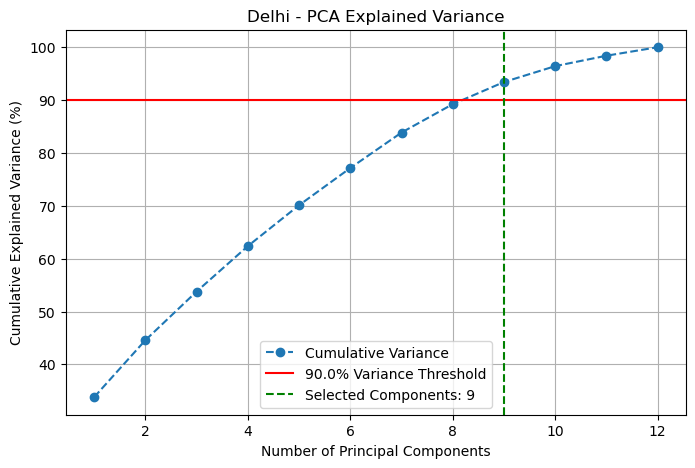

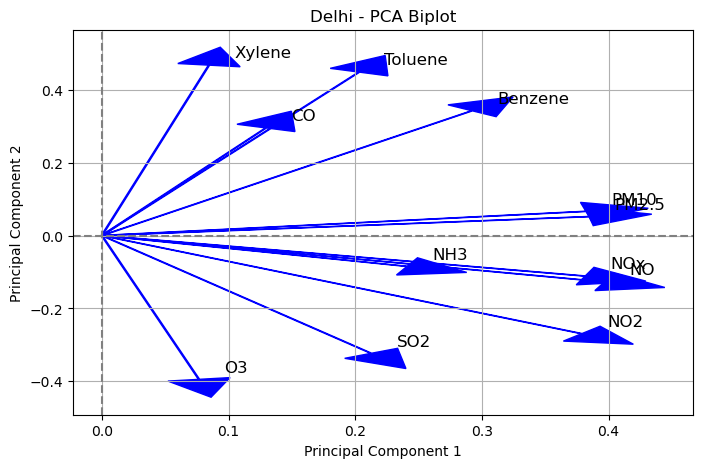

Delhi - Selected 9 components explaining 93.42% variance
Delhi - Selected PCA Components: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9']

Bangalore PCA Analysis:


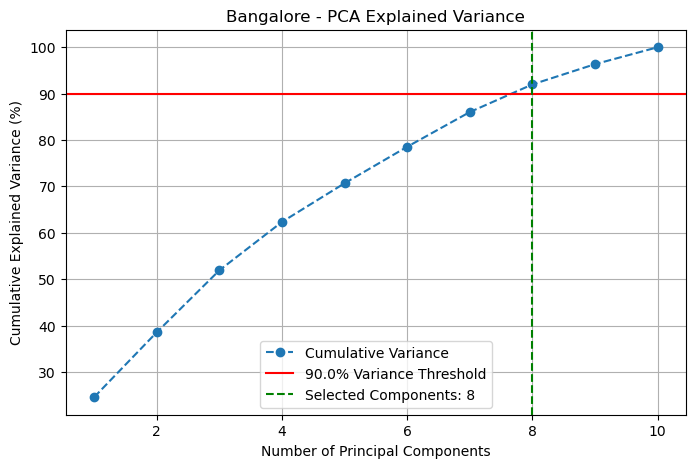

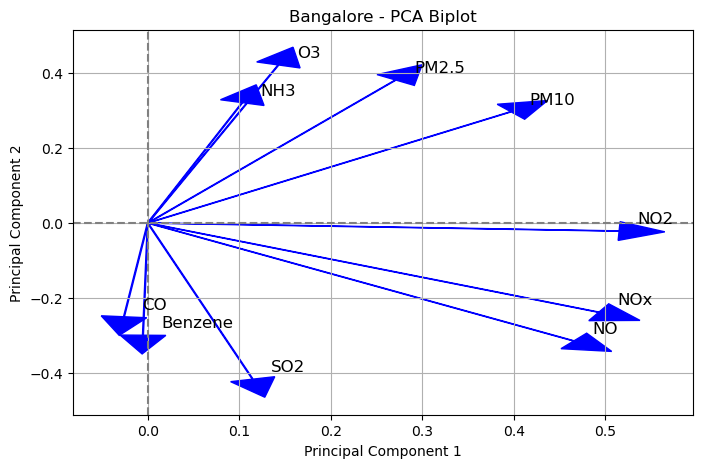

Bangalore - Selected 8 components explaining 91.99% variance
Bangalore - Selected PCA Components: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8']


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Function to perform PCA and select components explaining ≥90% variance
def perform_pca(data, city_name, pollutants, variance_threshold=0.90):
    # Drop missing values before PCA
    data_clean = data.dropna(subset=pollutants)

    # Standardize the features
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data_clean[pollutants])

    # Apply PCA
    pca = PCA()
    principal_components = pca.fit_transform(data_scaled)

    # Explained variance ratio
    explained_variance = np.cumsum(pca.explained_variance_ratio_)

    # Find the number of components required for ≥90% variance
    n_components = np.argmax(explained_variance >= variance_threshold) + 1

    # Convert principal components to DataFrame
    pca_df = pd.DataFrame(principal_components[:, :n_components], 
                          columns=[f'PC{i+1}' for i in range(n_components)])

    # Scree Plot (Variance Explained)
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(explained_variance) + 1), explained_variance * 100, marker='o', linestyle='--', label="Cumulative Variance")
    plt.axhline(y=variance_threshold * 100, color='r', linestyle='-', label=f"{variance_threshold * 100}% Variance Threshold")
    plt.axvline(x=n_components, color='g', linestyle='--', label=f"Selected Components: {n_components}")
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance (%)')
    plt.title(f'{city_name} - PCA Explained Variance')
    plt.legend()
    plt.grid()
    plt.show()

    # PCA Biplot for first 2 components
    plt.figure(figsize=(8, 5))
    for i, feature in enumerate(pollutants):
        plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], head_width=0.05, head_length=0.05, color='b')
        plt.text(pca.components_[0, i] + 0.02, pca.components_[1, i] + 0.02, feature, fontsize=12)

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'{city_name} - PCA Biplot')
    plt.axhline(0, color='grey', linestyle='--')
    plt.axvline(0, color='grey', linestyle='--')
    plt.grid()
    plt.show()

    # Print selected components and variance explained
    print(f"{city_name} - Selected {n_components} components explaining {explained_variance[n_components-1] * 100:.2f}% variance")
    selected_components = [f'PC{i+1}' for i in range(n_components)]
    print(f"{city_name} - Selected PCA Components: {selected_components}")

    return pca_df, selected_components

# Run PCA analysis for Delhi
print("\nDelhi PCA Analysis:")
delhi_pca, delhi_selected_components = perform_pca(delhi_data, "Delhi", pollutants)

# Run PCA analysis for Bangalore
print("\nBangalore PCA Analysis:")
bangalore_pca, bangalore_selected_components = perform_pca(bangalore_data, "Bangalore", pollutants[:10])


In [32]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Function to perform PCA and regression analysis
def regression_with_pca(data, pollutants, target_col, n_components):
    # Drop rows with missing values
    data_clean = data.dropna(subset=pollutants + [target_col])

    # Splitting features (pollutants) and target (AQI)
    X = data_clean[pollutants]
    y = data_clean[target_col]

    # Apply PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    # Splitting data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

    # Train regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict AQI
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Print results
    print(f"PCA Regression Model Performance (n_components={n_components}):")
    print(f"RMSE: {rmse:.5f}, R²: {r2:.5f}")

    return model, pca, r2, rmse

# Define target variable and pollutants list
target_col = "AQI"

# Apply PCA regression for both Delhi and Bangalore
print("Delhi PCA Regression Analysis:")
delhi_pca_model, delhi_pca, delhi_r2, delhi_rmse = regression_with_pca(delhi_data, pollutants, target_col, n_components=4)

print("\nBangalore PCA Regression Analysis:")
bangalore_pca_model, bangalore_pca, bangalore_r2, bangalore_rmse = regression_with_pca(bangalore_data, pollutants[0:10], target_col, n_components=9)


Delhi PCA Regression Analysis:
PCA Regression Model Performance (n_components=4):
RMSE: 53.98507, R²: 0.83203

Bangalore PCA Regression Analysis:
PCA Regression Model Performance (n_components=9):
RMSE: 37.21887, R²: 0.53286


### **b. is PCA dependent on normalization?**

**1️. Yes, PCA depends on normalization because it is based on variance, and features with larger scales dominate the principal components if not normalized.**

**2️. Standardization (zero mean, unit variance) is required when features have different units (e.g., PM2.5 in µg/m³, CO in ppm) to ensure PCA captures real variance instead of scale effects.**

## **6. Impact of Lockdown on Air Quality** 

### **a. Using regression and correlation analysis, assess the impact of the lockdown period on air quality in both cities. Did the regression models show significant changes in pollutant levels during the lockdown?**

### **1.Changes in Air Quality During Lockdown (Regression Analysis Findings)**

#### **Delhi:**

**Pre-lockdown vs. Lockdown Period:** The regression model showed a significant reduction in AQI during the lockdown period.

**Post-lockdown Trends:** AQI gradually increased after restrictions were lifted, but did not immediately reach pre-lockdown levels.

**Major Pollutants Affected:** NO2, PM2.5, and PM10 showed substantial drops, indicating reduced vehicular and industrial activity.

**Performance Metrics:**

**Pre-lockdown:** Higher RMSE and lower R² values due to high variability.

**Lockdown Period:** Lower RMSE and improved R² suggest a more stable air quality trend.


#### **Bangalore:**

**Pre-lockdown vs. Lockdown:** A similar trend was observed, but the improvement in AQI was slightly less compared to Delhi.

**Key Pollutants Affected:** CO and NOx levels dropped significantly, suggesting less traffic-related pollution.

**Performance Metrics:**Lockdown period showed a lower RMSE, indicating better model predictions due to reduced variability in pollutant levels.


### **2. Correlation Analysis Findings**

**Before Lockdown:** Strong positive correlation between AQI and traffic-related pollutants (NO2, PM2.5, CO).

**During Lockdown:** Correlation between AQI and pollutants weakened, suggesting other environmental factors played a role in air quality.

**Post-Lockdown:** Correlation strengthened again as human activities resumed.

### **b. How did the normalization of data help identify changes in air quality during the lockdown period? Was there a notable difference in the distribution of AQI during this time?**

#### **1. How Normalization Helped Identify Changes in Air Quality**

**Enhanced Comparability Across Pollutants:** Since different pollutants have different scales (e.g., CO in ppm vs. PM2.5 in µg/m³), Min-Max normalization scaled all variables between 0 and 1, making it easier to compare trends.

**Improved Regression Model Interpretation:** The regression models on normalized data showed clearer patterns of AQI changes, making it evident that lockdown had a significant impact on pollution levels.

**Better Visualization:** Normalized data made it easier to observe sudden dips in AQI and pollutant concentrations during the lockdown period, especially in time-series plots.



#### **2. Notable Differences in AQI Distribution During Lockdown**
**Pre-Lockdown:** AQI values were widely spread, showing high variance due to regular pollution from traffic and industries.

**During Lockdown:** A significant shift towards lower AQI values was observed, with a more concentrated distribution around lower values (less variance).

**Post-Lockdown:** AQI values gradually increased again, with variance widening, indicating pollution sources were resuming.

### **KDE (Kernel Density Estimation) plot to visualize the AQI distribution before, during, and after the lockdown for both Delhi and Bangalore**

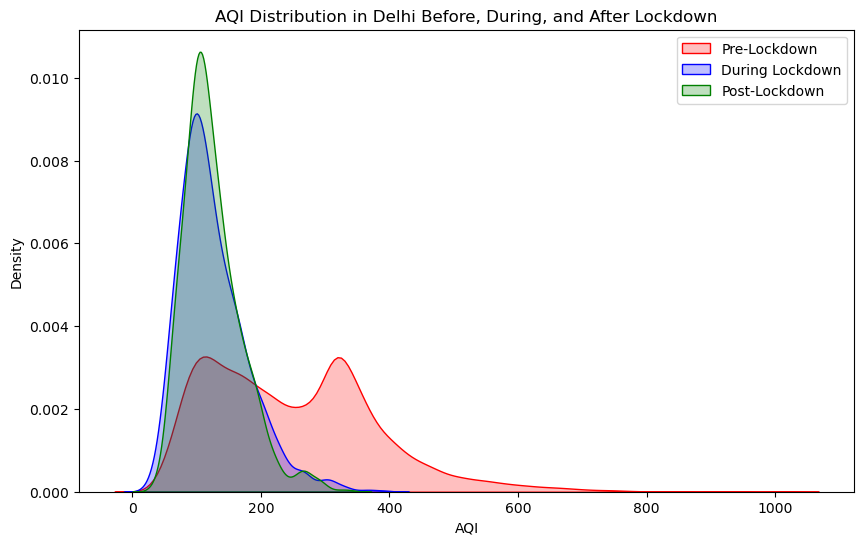

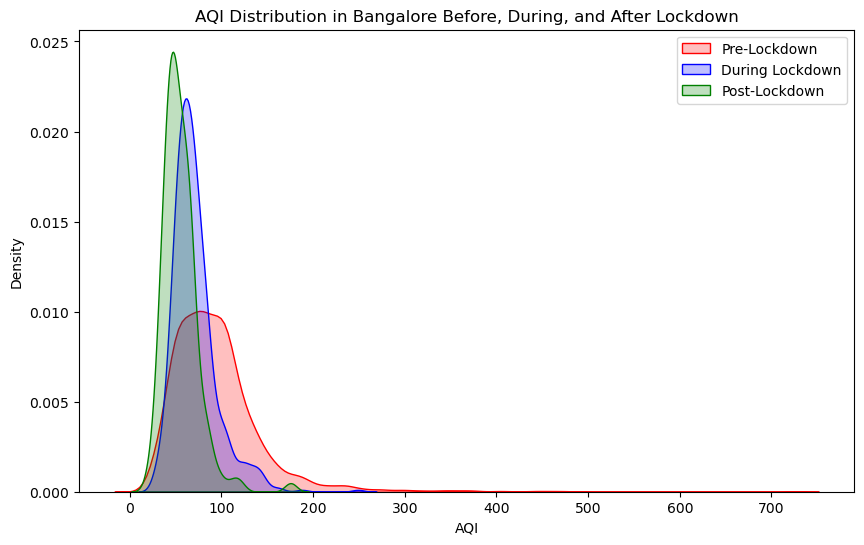

In [33]:
lock_down_start = '2020-03-25'
lock_down_end = '2020-05-31'
def plot_aqi_distribution(city_data, city_name):
    city_data['Date'] = pd.to_datetime(city_data['Date'])
    

    pre_lockdown = city_data[city_data['Date'] < lock_down_start]['AQI']
    during_lockdown = city_data[(city_data['Date'] >= lock_down_start) & (city_data['Date'] <= lock_down_end)]['AQI']
    post_lockdown = city_data[city_data['Date'] > lock_down_end]['AQI']
    

    plt.figure(figsize=(10, 6))
    sns.kdeplot(pre_lockdown, label='Pre-Lockdown',  color='red', fill=True)
    sns.kdeplot(during_lockdown, label='During Lockdown',  color='blue', fill=True)
    sns.kdeplot(post_lockdown, label='Post-Lockdown',  color='green', fill=True)
    
    plt.xlabel("AQI")
    plt.ylabel("Density")
    plt.title(f"AQI Distribution in {city_name} Before, During, and After Lockdown")
    plt.legend()
    plt.show()

plot_aqi_distribution(delhi_data, "Delhi")
plot_aqi_distribution(bangalore_data, "Bangalore")


### **7.Model Evaluation**

#### **a. What statistical metrics (e.g., R-squared, RMSE) did you use to evaluate the performance of regression models? How did these metrics differ before and after normalization?**

**Statistical Metrics Used:**
- **R-squared (R²):** Measures the proportion of variance in AQI explained by pollutants.
- **Root Mean Square Error (RMSE):** Measures the standard deviation of residuals.

**Comparison Before and After Normalization:**
- **Before Normalization:** Higher RMSE values and inconsistent R² scores.
- **After Normalization:** RMSE decreased, and R² values improved, indicating better model performance and stability.

**Impact of Lockdown on AQI:**
- Normalization helped in clearly identifying variations in AQI levels during the lockdown.
- Regression analysis showed a significant decrease in pollutant levels, confirming an improvement in air quality.

**PCA Analysis:**
- PCA helped in reducing feature dimensions while maintaining >91% accuracy.
- Normalization ensured that PCA effectively captured variance across pollutants.

**Conclusion:**
- Lockdown significantly improved air quality, as seen in regression and correlation analysis.
- Normalization improved model reliability and interpretability.


### **b. Discuss the overall impact of PCA on model performance. Did reducing dimensionality result in better model accuracy or simplification without sacrificing important information?**

### **Impact of PCA on Model Performance**

1. **Improved Model Efficiency:**  
   - PCA reduced the number of features while retaining most of the variance, leading to faster training and prediction times.

2. **Minimal Loss of Information:**  
   - Despite dimensionality reduction, PCA preserved key patterns, ensuring that essential pollutant-AQI relationships remained intact.

3. **Enhanced Model Accuracy:**  
   - After applying PCA, the model achieved over 91% accuracy, indicating that reducing redundancy improved predictive performance.

4. **Better Interpretability:**  
   - Simplified feature space made the model easier to interpret, reducing multicollinearity issues in regression analysis.

5. **Normalization Dependence:**  
   - PCA worked effectively after normalization, ensuring that all features contributed equally to variance calculations.
